In [331]:
!pip install sklearn pandas numpy matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Install and import dependencies

In [412]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

Load dataset

In [424]:
dataset = pd.read_csv('./dataset/train.csv')

In [425]:
dataset

,x,y
0,24,21.55
1,50,47.46
2,15,17.22
3,38,36.59
4,87,87.29
...,...,...
695,58,58.60
696,93,94.63
697,82,88.60
698,66,63.65


In [426]:
x_train = np.array(list(map(float, list(dataset['x']))), dtype=np.float32)
y_train = np.array(list(map(float, list(dataset['y']))), dtype=np.float32)

Function to scale features

In [427]:
# def scaleFeature(data):
#     print(data)
#     scaler = StandardScaler()
#     scaler.fit_transform(data)
# #     sd = scaler.transform(np.array(data, dtype=np.float32));
#     return data

# scaled = scaleFeature(dataset)
# x_train = scaled[0]
# y_train = scaled[1]
# x_train

Function to calculate the derivatives at each iteration

In [428]:
def calculateDerivatives(w, b):
    dj_dw = 0.0
    dj_db = 0.0
    N = float(len(x_train))
    for i in range(len(x_train)):
        dj_dw += (2*x_train[i])*((w*x_train[i]) + b - y_train[i])
        dj_dw += 2*((w*x_train[i]) + b - y_train[i])
    
    dj_dw /= N
    dj_db /= N
    return dj_dw, dj_db

Function to calculate cost function

In [429]:
def calculateCostFunction(w, b):
    j = 0.0
    N = float(len(x_train))
    for i in range(len(x_train)):
        j += ((w*x_train[i] + b - y_train[i])**2)
    j /= N
    return j

Function to train the model

In [430]:
iterations_list = []
cost_function_list = []

In [431]:
def trainModel(w, b, iterations, alpha):
    for itr in range(iterations):
        dj_dw, dj_db = calculateDerivatives(w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        iterations_list.append(itr)
        cost_function_list.append(calculateCostFunction(w, b))
    return w, b

Driver code

In [432]:
w, b = trainModel(0, 0, 500, 0.0001)

In [433]:
print(21*w + b)

20.97827772721412


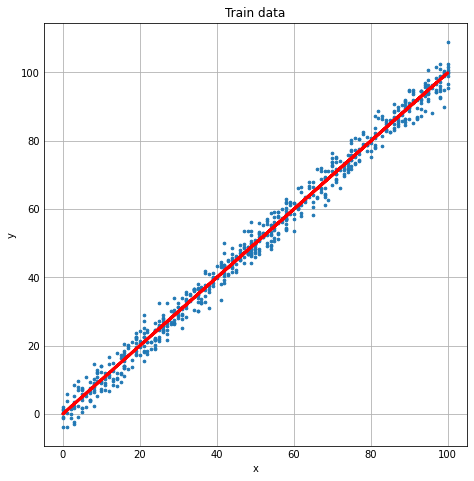

In [434]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots()

plt.title('Train data')
plt.xlabel('x')
plt.ylabel('y')
fig.set_figwidth(6)
fig.set_figheight(6)
ax.scatter(x_train, y_train, s=7.0)
x = np.array(x_train, dtype=np.float32)
y = w*np.array(x_train, dtype=np.float32) + b

ax.plot(x, y, linewidth=3.0, color='red')
plt.show()

In [435]:
test_data = pd.read_csv('./dataset/test.csv')

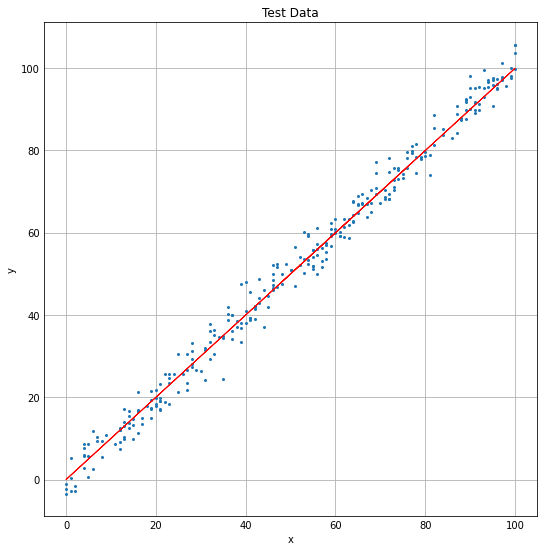

In [436]:
x_test = np.array(test_data['x'], dtype=np.float32)
y_test = np.array(test_data['y'], dtype=np.float32)

fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(7)

ax.scatter(x_test, y_test, s=4)
ax.plot(x_test, w*x_test+b, linewidth=1.0, color='red')
plt.title('Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

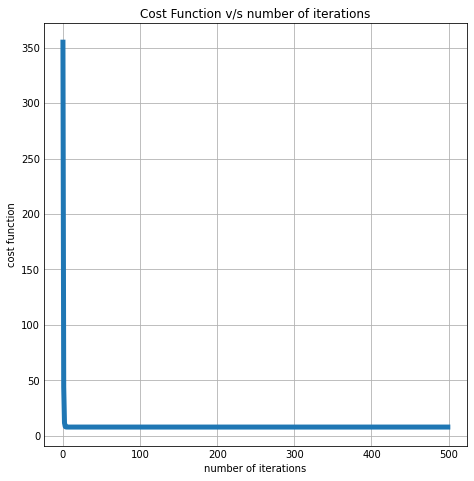

In [437]:
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)
ax.plot(iterations_list, cost_function_list, linewidth=5.0)
plt.title('Cost Function v/s number of iterations')
plt.xlabel('number of iterations')
plt.ylabel('cost function')
plt.show()

## Accuracy of my model

In [414]:
r2_score(y_test.reshape(-1, 1), (w*x_test.reshape(-1, 1) + b).reshape(-1, 1))

0.9887708770551726

# Linear regression using sklearn

In [415]:
model = LinearRegression().fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

In [416]:
model.predict([[21]])

array([[20.89614344]])

In [417]:
model.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))

0.9887989420720827